In [16]:
# For local circular coordinates coordinatization (optional)
from dreimac import CircularCoords    

from circle_bundles.bundle import build_bundle
from circle_bundles.base_covers import MetricBallCover
from circle_bundles.synthetic.tori_and_kb import sample_C2_torus

from circle_bundles.metrics import (
    RP1AngleMetric as rp1_metric,
    Torus_DiagQuotientMetric_R4 as diag_metric,
    Torus_KleinQuotientMetric_R4 as kb_metric,
    S3QuotientMetric as s3_quotient_metric,
    RP2_TrivialMetric as rp2_trivial_metric,
    RP2_TwistMetric as rp2_nontrivial_orientable_metric,
    RP2_FlipMetric as rp2_nonorientable_metric   
)


from circle_bundles.synthetic.s2_bundles import sample_sphere, hopf_projection, sample_s2_trivial
from circle_bundles.covers.triangle_cover_builders_fibonacci import (
    make_s2_fibonacci_star_cover,
    make_rp2_fibonacci_star_cover
)

# Lens Spaces $L(p,1) = \mathbb{S}^{3}/\mathbb{Z}_{p}$ As Circle Bundles Over $\mathbb{S}^{2}$

In [2]:
n_samples = 10000
s3_data = sample_sphere(n = n_samples, dim = 3)

print(f'{n_samples} samples from S3 generated.')

10000 samples from S3 generated.


In [3]:
#Compute base projections to S2
v = np.array([1.0, 0.0, 0.0]) 
base_points = hopf_projection(s3_data, v = v)
print(f'Base projections computed.')

Base projections computed.


### Cover And Nerve Summary
- $n_\text{sets} = 80$, $n_\text{samples} = 10000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 80$
- $\#(\text{1-simplices}) = 234$
- $\#(\text{2-simplices}) = 156$
- *No recorded simplices in dimensions* $\ge 3$

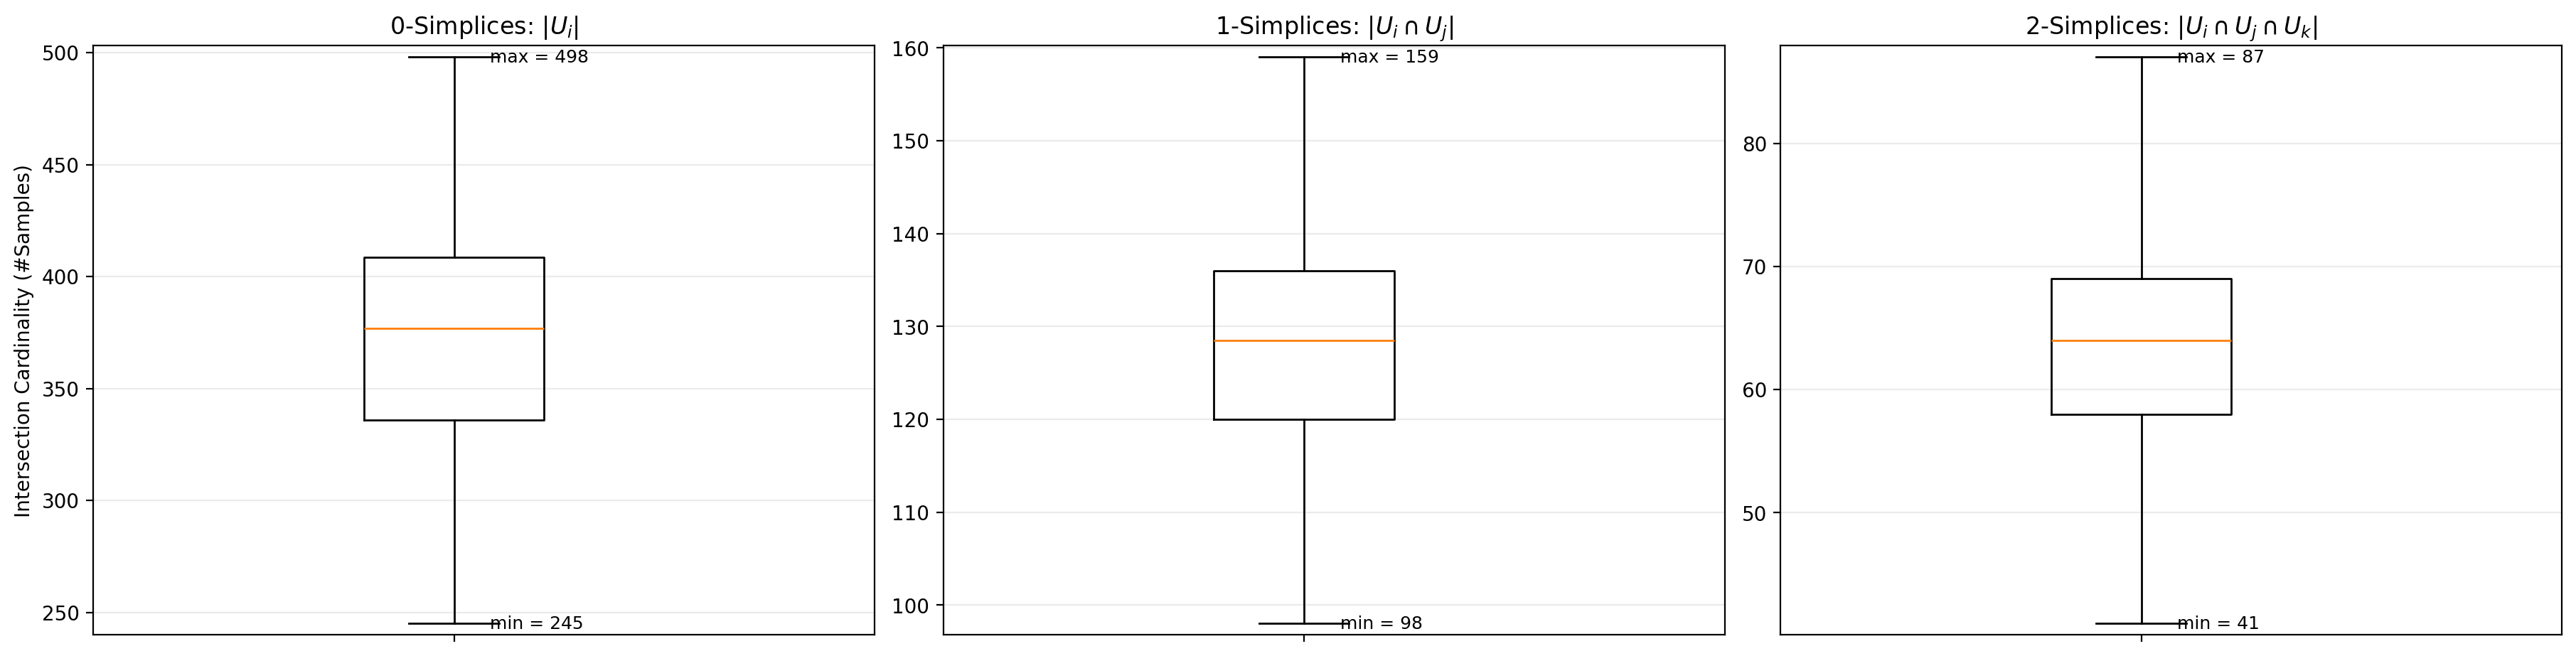

In [4]:
#Construct an open cover of S2

n_landmarks = 80
s2_cover = make_s2_fibonacci_star_cover(base_points, n_vertices = n_landmarks)
s2_summ = s2_cover.summarize(plot = True)

In [5]:
#Compute local trivializations and characteristic classes using a quotient metric on S3

p = 4   #Choose a p-value for the quotient metric
total_metric = s3_quotient_metric(p=p, v_axis = v, antipodal = False)    

lens_bundle = build_bundle(
    s3_data,
    s2_cover,
#    CircularCoords_cls=CircularCoords,  #optionally use sparse circular coordinates
    total_metric = total_metric,
    show=True,
)


<IPython.core.display.Math object>

# Quotients $(\mathbb{S}^{2}\times\mathbb{S}^{1})/\mathbb{Z}_{2}$ As Circle Bundles Over $\mathbb{RP}^{2}$ 

In [12]:
#Generate a sample from the trivial bundle over S2

n_samples = 10000
sigma = 0.05
data, base_points, angles = sample_s2_trivial(
    n_points = n_samples,
    sigma = sigma,
    radius_clip = (0.0, 5.0),
)
print(f'Generated {n_samples} samples from the product circle bundle over S2.')

Generated 10000 samples from the product circle bundle over S2.


### Cover And Nerve Summary
- $n_\text{sets} = 80$, $n_\text{samples} = 10000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 80$
- $\#(\text{1-simplices}) = 237$
- $\#(\text{2-simplices}) = 158$
- *No recorded simplices in dimensions* $\ge 3$

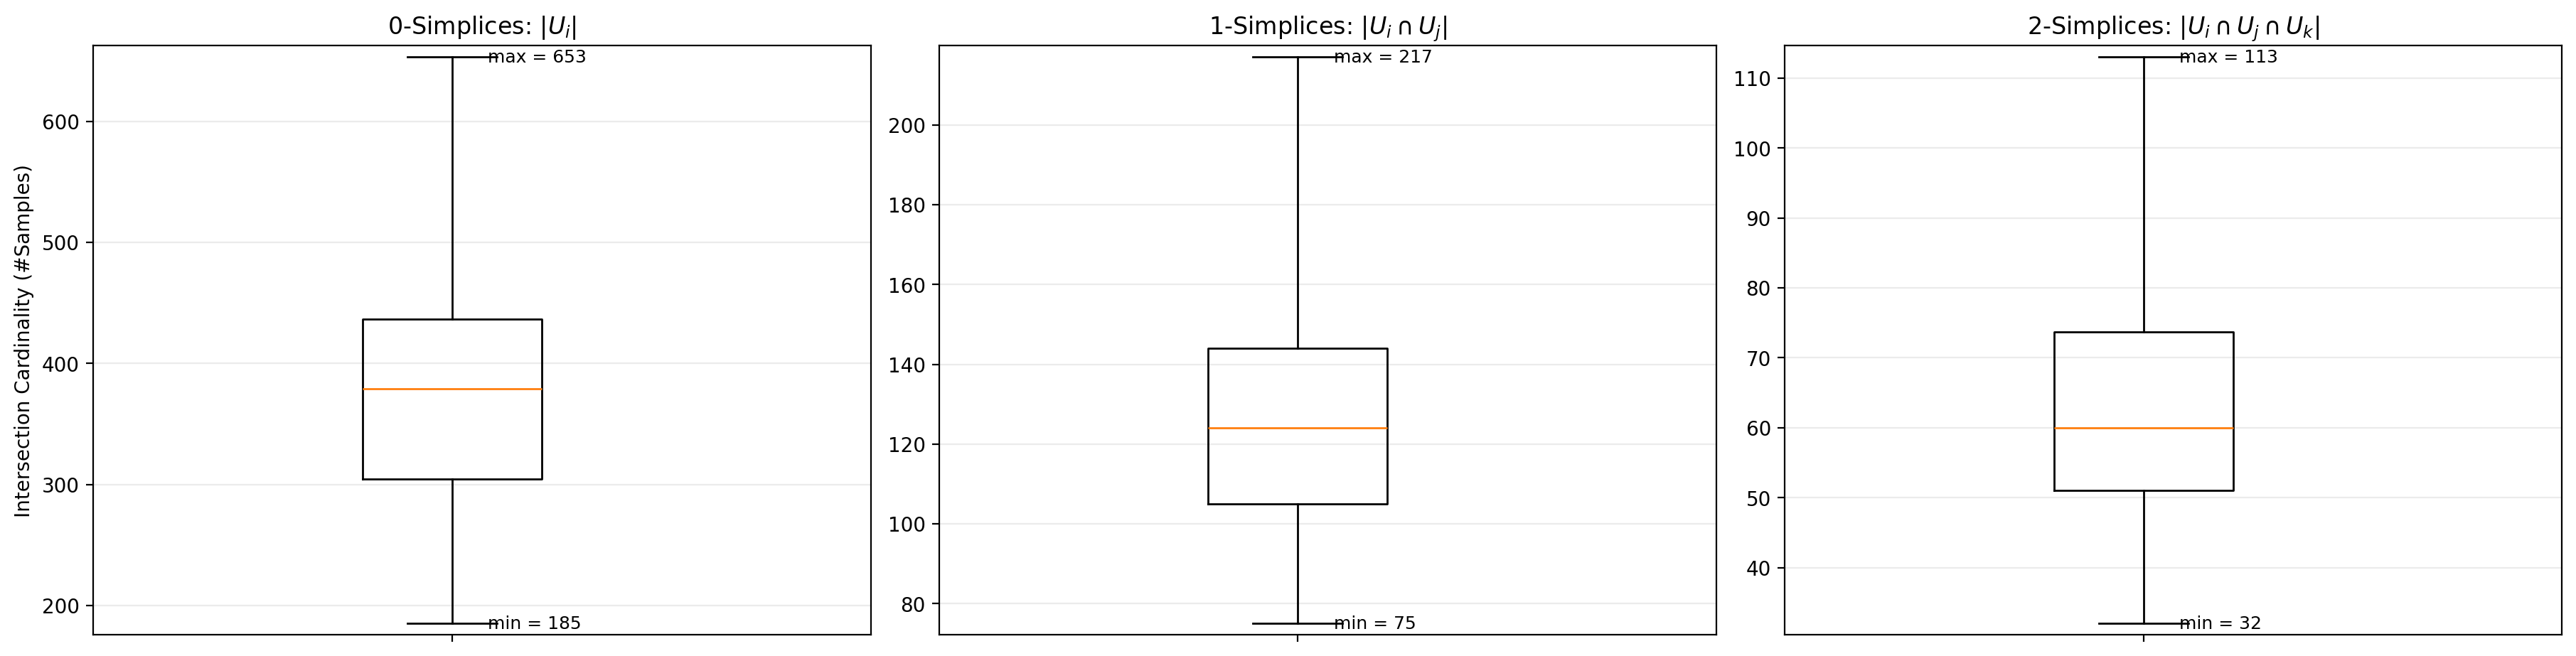

In [14]:
#Map base points to RP2 (use upper half sphere representatives for visualization)
base_points[base_points[:,-1] < 0] = -1*base_points[base_points[:,-1] < 0]

#Construct an open cover of RP2
n_landmarks = 80
rp2_cover = make_rp2_fibonacci_star_cover(base_points, n_pairs = n_landmarks)
rp2_summ = rp2_cover.summarize(plot = True)

In [19]:
#Compute local trivializations and characteristic classes

total_metrics = [rp2_trivial_metric(), rp2_nontrivial_orientable_metric(), rp2_nonorientable_metric()]  


j = 1   #Choose a metric on the total space
total_metric = total_metrics[j]


bundle = build_bundle(
    data,
    rp2_cover,
#    CircularCoords_cls=CircularCoords,  #optionally use sparse cc's
    total_metric = total_metric,
    show=True,
)


<IPython.core.display.Math object>

In [20]:
#Compute class persistence on the weights filtration of the nerve
pers = bundle.get_persistence(show = True)


<IPython.core.display.Math object>

# Quotients $\mathbb{S}^{3}/(\mathbb{Z}_{p}\rtimes\mathbb{Z}_{2})$ As Circle Bundles Over $\mathbb{RP}^{2}$

In [22]:
n_samples = 10000
s3_data = sample_sphere(n = n_samples, dim = 3)

v = np.array([1.0, 0.0, 0.0]) 
base_points = hopf_projection(s3_data, v= v)

print(f'Generated {n_samples} samples from S3.')

Generated 10000 samples from S3.


### Cover And Nerve Summary
- $n_\text{sets} = 80$, $n_\text{samples} = 10000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 80$
- $\#(\text{1-simplices}) = 237$
- $\#(\text{2-simplices}) = 158$
- *No recorded simplices in dimensions* $\ge 3$

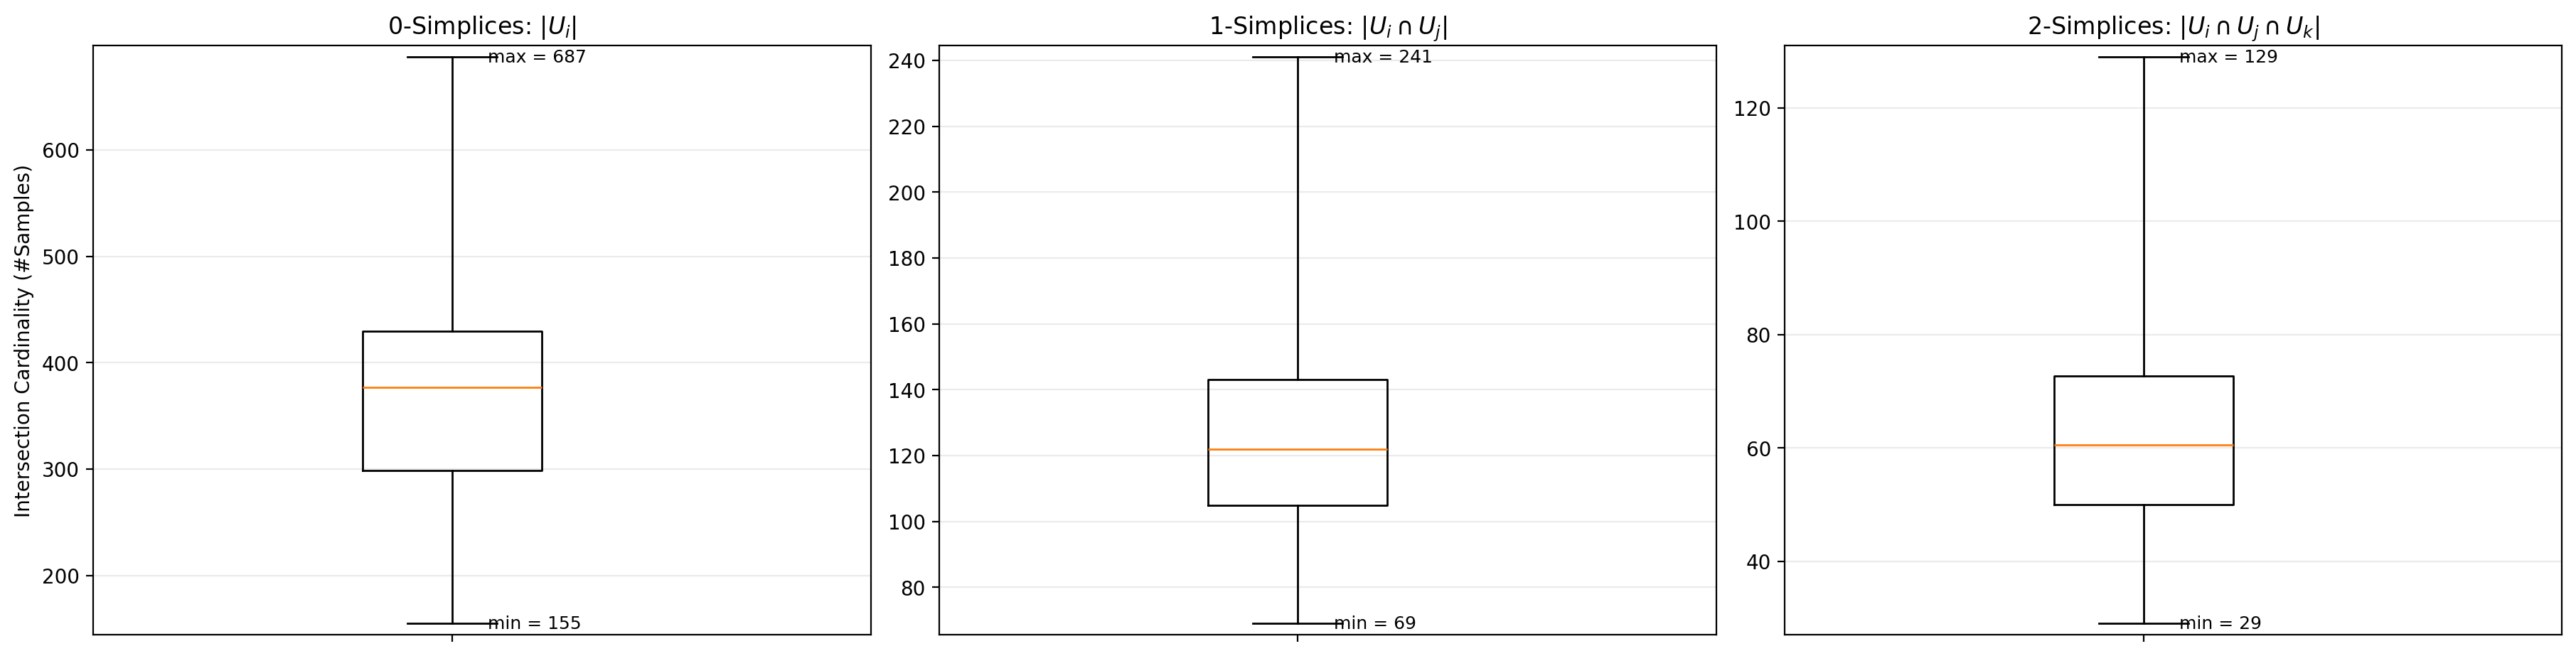

In [24]:
#Construct an open cover of RP2
n_landmarks = 80
rp2_cover = make_rp2_fibonacci_star_cover(base_points, n_pairs = n_landmarks)
rp2_summ = rp2_cover.summarize(plot = True)

In [26]:
#Compute local trivializations and characteristic classes using a quotient metric on S3

p = 2  #Choose a p-value for the quotient metric
total_metric = s3_quotient_metric(p = p, v_axis = v, antipodal = True)

bundle = build_bundle(
    s3_data,
    rp2_cover,
#    CircularCoords_cls=CircularCoords,  #optionally use sparse cc's 
    total_metric = total_metric,
    show=True,
)


<IPython.core.display.Math object>

In [27]:
#Compute class persistence on the weights filtration of the nerve
pers = bundle.get_persistence(show = True)


<IPython.core.display.Math object>

In [28]:
#Construct a classifying map to the Stiefel manifold and compute the pullback bundle

pullback_results = bundle.get_pullback_data(
    subcomplex = 'full',
    base_weight=1.0,
    fiber_weight=1.0,
    packing = 'coloring2',
    show_summary = True
)


<IPython.core.display.Math object>

In [29]:
#Construct a pullback coordinate bundle object

pb_bundle = build_bundle(
    pullback_results.total_data,
    rp2_cover,
#    CircularCoords_cls=CircularCoords,     #OPTION: use Dreimac for circular coordinates
    show=True,
    total_metric = pullback_results.metric 
)


<IPython.core.display.Math object>